# Assignment 1: August $20^{th}$, 2025 - Kanak Agarwal

## Legendre's Polynomial

The legendre's Polynomials, defined as $P_n(x)$, are solutions to the $n^{th}$ degree polynomial,

\begin{equation*}
(1 - x^2)P_n^{''}(x) + 2xP_n^{'}(x) + n(n+1)P_n(x) = 0
\end{equation*}

These are defined on the interval $[-1, 1]$ and are orthogonal with respect to the innner product of this interval. This implies that,

\begin{equation*}
\int_{-1}^{1} P_n(x) P_m(x) \, dx = 0 \quad \text{for } n \neq m
\end{equation*}

## Generating the Legendre Polynomials

* Generating Function:

\begin{equation*}
\frac{1}{\sqrt{1 - 2xt + t^2}} = \sum_{n=0}^{\infty} P_n(x) t^n
\end{equation*}


* Recurrence Formulation:

\begin{equation*}
(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
\end{equation*}

Rewriting the Recurrence Formulation in terms of $P_n(x)$, $P_{n-1}(x)$ and $P_{n-2}(x)$,   

\begin{equation*}
P_n(x) = \frac{(2n-1)xP_{n-1}(x) - (n-1)P_{n-2}(x)}{n}
\end{equation*}

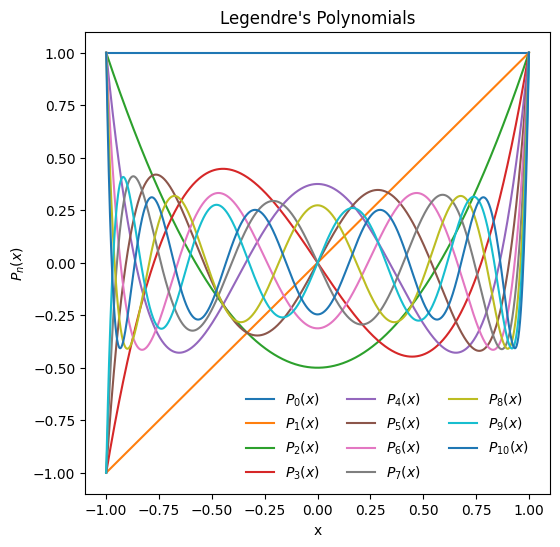

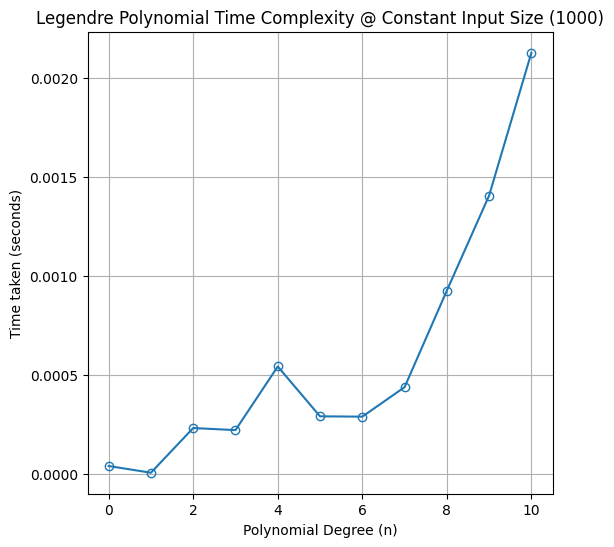

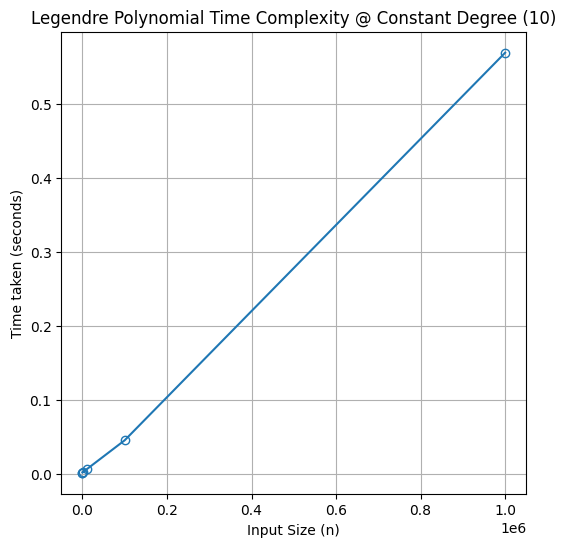

In [149]:
# Defining the Legendre's Polynomial using the Recurrence Formulation via a Recursive Function definition
# Substituting for (n) as (n-1) to get the series to generate P_n as opposed to P_(n+1)

import numpy as np 
import matplotlib.pyplot as plt
import time

def legendre_recurrence(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        return ((2*n - 1) * x * legendre_recurrence(n-1, x) - (n - 1) * legendre_recurrence(n-2, x)) / n

deg = [0,1,2,3,4,5,6,7,8,9,10]
x = np.linspace(-1,1,1000)

t = []

plt.figure(figsize=(6, 6))
for i in deg:
    start_time = time.time()
    y = legendre_recurrence(i, x)
    end_time = time.time()
    t.append(end_time - start_time)
    plt.plot(x, y, label=f"$P_{{{i}}}(x)$")
plt.legend(loc="upper center", bbox_to_anchor=(0.65, 0.25), ncol=3, frameon=False)
plt.title('Legendre\'s Polynomials')
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.show()

# Time complexity of the Legendre Polynomial with varying degree for constant Input Size (1000)

plt.figure(figsize=(6, 6))
plt.plot(deg, t, marker='o',markerfacecolor='none')
plt.title('Legendre Polynomial Time Complexity @ Constant Input Size (1000)')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Time taken (seconds)')
plt.grid()
plt.show()

# Time complexity of the Legendre Polynomial with varying input size for constant degree (10 - worst case)

size = [10,100,1000,10000,100000,1000000]
t_size = []
for i in size:
    start_time = time.time()
    x = np.linspace(-1, 1, i)
    y = legendre_recurrence(10, x)
    end_time = time.time()
    t_size.append(end_time - start_time)

plt.figure(figsize=(6, 6))
plt.plot(size, t_size, marker='o',markerfacecolor='none')
plt.title('Legendre Polynomial Time Complexity @ Constant Degree (10)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time taken (seconds)')
plt.grid()
plt.show()

## Horner's Polynomial Evaluation

Horner's method evaluates the polynomial in a single pass with $\mathcal{O}(n)$ complexity. Instead of explicitly computing the power's of $x$ in each term these are computed successively to reduce computational complexity. The coefficients are accessed in the reversed order.

\begin{equation*}
P(x) = (((a_nx + a_{n-1})x) + a_{n-2})x+ ... a_0
\end{equation*}

In [99]:
# Horner's Method for Polynomial Evaluation - Function Definition

def polynomial_horner(coeffs, x):
    n = len(coeffs)
    result = 0
    for coeff in reversed(coeffs):
        result = result * x + coeff
    return result

Horner's Polynomial Evaluation: -23


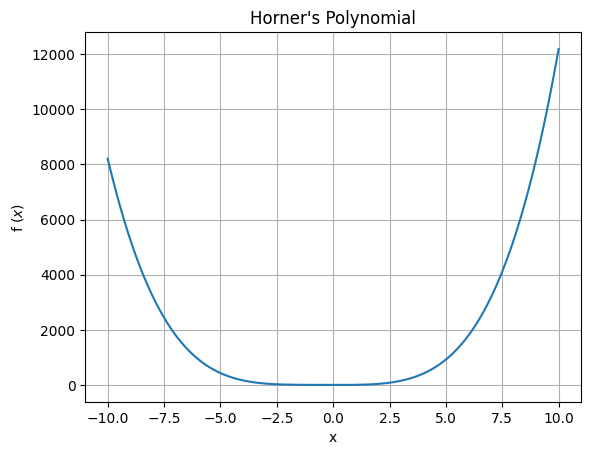

In [130]:
coeffs = [1, 2, 2, -1, 0]
x_val = 4

start_time = time.time()
result = polynomial_horner(coeffs, x_val)
end_time = time.time()

x = np.linspace(-10, 10, 1000)
y = x**4 + 2*x**3 + 2*x**2 - x

print("Horner's Polynomial Evaluation:", result)

plt.plot(x, y)
plt.title('Horner\'s Polynomial')
plt.xlabel('x')
plt.ylabel('f $(x)$')
plt.grid()
plt.show()

## Writing $f(x)$ as a sum of Legendre's Polynomials

Essentially we are looking for coefficients that satisfy the equation:

$$ f(x) = \sum_{n=0}^{N} a_n P_n(x) $$

where $P_n(x)$ are the Legendre polynomials and $a_n$ are the coefficients we want to find. Given that we know that the $4^{th}$ Legendre Polynomial is of the $4^{th}$ order in $x$, this is enough to find the coefficients $a_n$ and the higher order Legendre Polynomials can be discounted. Since,

$$ P_4(x) = \frac{1}{8}(35x^4 - 30x^2 + 3) $$

The coefficients are given by,

$$ a_n = \frac{2n+1}{2} \int_{-1}^{1} f(x) P_n(x) \, dx $$


The coefficients are: [0.8666666666666667, 0.20000000000000004, 1.9047619047619044, 0.8, 0.2285714285714286]


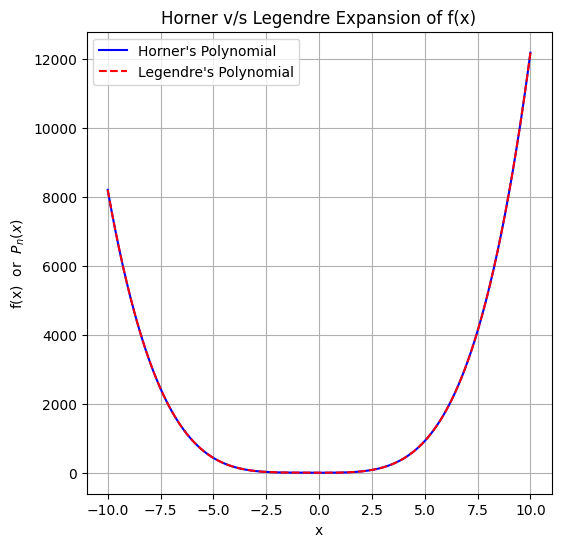

In [147]:
import numpy as np
import scipy.integrate as spi
from scipy.integrate import quad

# Define the Legendre's Polynomials upto the 4th order
def legendre_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n == 2:
        return 0.5 * (3 * x**2 - 1)
    elif n == 3:
        return 0.5 * (5 * x**3 - 3 * x)
    elif n == 4:
        return 0.125 * (35 * x**4 - 30 * x**2 + 3)
    else:
        raise ValueError("Legendre polynomial of order {} is not defined.".format(n))

def horner_polynomial(x):
    return x**4 + 2*x**3 + 2*x**2 - x

a = []
x = np.linspace(-10, 10, 1000)
for n in range(5):
    integrand = lambda x: horner_polynomial(x) * legendre_polynomial(n, x)
    val, _ = quad(integrand, -1, 1) # Not interested in the error, discount it
    coeff = (2*n+1)/2 * val
    a.append(coeff)

print(f"The coefficients are: {a}")

def func_legendre(x):
    return sum(a[n] * legendre_polynomial(n, x) for n in range(5))

y_poly = horner_polynomial(x)
y_leg = func_legendre(x)

plt.figure(figsize=(6, 6))
plt.plot(x, y_poly, 'b-', label="Horner's Polynomial")
plt.plot(x, y_leg, 'r--', label="Legendre's Polynomial")
plt.legend(loc="upper left")
plt.title("Horner v/s Legendre Expansion of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)  or  $P_n(x)$")
plt.grid()
plt.show()

## Discussion of Results

Both Legendre's and Horner's representation of the polynomials produce the same curve when plotted, and hence both representations are valid and result in the same output. The fundamental difference between the Horner polynomial and the Legendre's polynomial is that the Horner's polynomial is useful to evaluate a polynomial at a given value of $x$ in a computationally efficient fashion resulting in $\mathcal{O}(n)$ time complexity. On the other hand, the Legendre's polynomials are a set of orthogonal polynomials that are solutions to the Legendre's differential equation. A combination of these polynomials can be used to exactly represent a given polynomial $f(x)$ using a set of appropriate coefficients ($a_n$).

## Application of Legendre's Polynomials

#### Potential Flow Around a Sphere

__Reference__: https://www.et.byu.edu/~treedoug/_pages/teaching/ChEn374/Potential_Flow_Sphere.pdf

Consider a steady, incompressible, irrotational and inviscid fluid flow around a spherical body. It is given by the laplace equation,

$$ \nabla^2 \phi = 0 $$

where $\phi$ = $\phi(r,\theta,\varphi)$. This system is represented by,

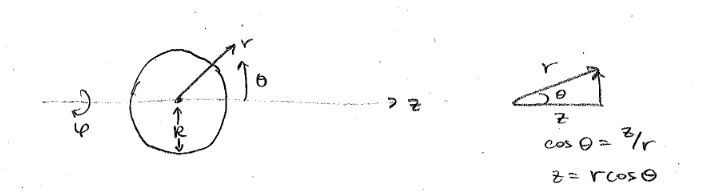

However, $\varphi$ is axisymmetric, hence $\phi = \phi(r, \theta)$. The boundary conditions for this problem are given by,

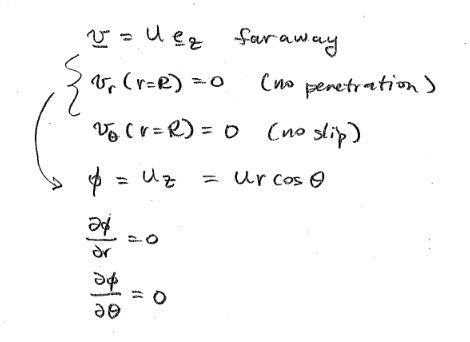

In spherical coordinates, the Laplacian operator is given by:

$$ \nabla^2 \phi = \frac{1}{r^2} \frac{\partial}{\partial r} \left( r^2 \frac{\partial \phi}{\partial r} \right) + \frac{1}{r^2 \sin \theta} \frac{\partial}{\partial \theta} \left( \sin \theta \frac{\partial \phi}{\partial \theta} \right) + \frac{1}{r^2 \sin^2 \theta} \frac{\partial^2 \phi}{\partial \varphi^2} = 0 $$

Due to symmetry this reduces to,

$$ \nabla^2 \phi = \frac{1}{r^2} \frac{\partial}{\partial r} \left( r^2 \frac{\partial \phi}{\partial r} \right) + \frac{1}{r^2 \sin \theta} \frac{\partial}{\partial \theta} \left( \sin \theta \frac{\partial \phi}{\partial \theta} \right) = 0 $$

A general solution to this problem can be obtained assuming a product solution of the form:

$$ \phi(r, \theta) = f(r) g(\theta) $$

applying superposition, this yield the general solution:

$$ \phi(r, \theta) = \sum_{n=0}^{\infty} \left( A_n r^n + \frac{B_n}{r^{n+1}} \right) P_n(\cos \theta) $$

where $P_n(\cos \theta)$ are the Legendre polynomials. Implementing the boundary condition,

$$ \phi(r = \infty, \theta) = U r \cos \theta $$

Expanding only in the first order term of the Legendre polynomials, we have:

$$ \phi(r, \theta) = A_1 r P_1(\cos \theta) + B_1 r^{-2} \cos \theta $$

when $r \to \infty$, the second term is equivalent to 0, thus comparing this with the boundary condition, we find,

$$ A_1 = U $$

Applying the second boundary condition,

$$ \frac{\partial \phi}{\partial r}\bigg\rvert_{(r = R)} = 0 $$

Thus,

$$ \frac{\partial \phi}{\partial r} = U \cos\theta - \frac{2B_1}{r^3} \cos\theta $$

Which in turn results in,

$$ B_1 = \frac{UR^3}{2} $$

Thus finally,

$$\boxed{\phi(r, \theta) = U r \cos \theta + \frac{U R^3}{2r^2} \cos \theta}$$

Given this potential function, we can now determine the velocity components,

$$ u_r = \frac{\partial \phi}{\partial r} = U \cos \theta \left[1 - \frac{R^3}{r^3}\right] $$
$$ u_\theta = \frac{1}{r} \frac{\partial \phi}{\partial \theta} = - U \sin \theta  \left[1 + \frac{R^3}{r^3}\right] $$

These can be converted to the Cartesian coordinate system. Further, from these velocity components, the streamlines can also be plotted.

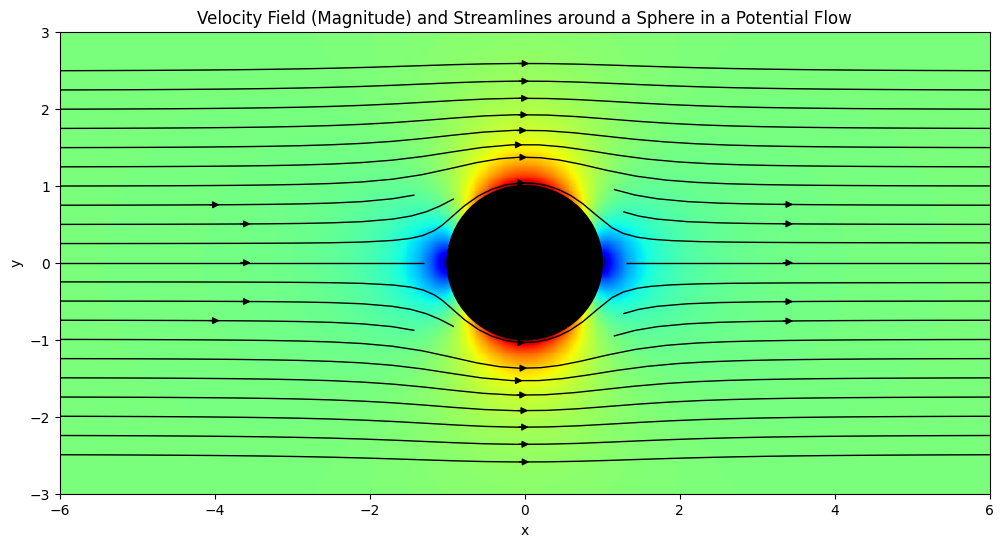

In [148]:
# Code to plot Velocity Magnitude and Streamlines for a potential flow about a spherical body.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
U = 1.0 # Freestream Velocity
R = 1.0 # Radius of the sphere

# Grid
x = np.linspace(-6*R, 6*R, 1000)
y = np.linspace(-3*R, 3*R, 500)
X, Y = np.meshgrid(x, y)

# Convert to polar coordinates
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

# Region Inside the Sphere
sphere = r < R

# Potential function
Phi = U*(r*np.cos(theta) + (R**3/(2*r**2))*np.cos(theta))
Phi[sphere] = np.nan

# Velocity Components
U_r = U * np.cos(theta) * (1 - (R**3 / r**3))
U_theta = -U * np.sin(theta) * (1 + (R**3 / r**3))

# Convert the velocity components to cartesian coordinates
U_x = U_r * np.cos(theta) - U_theta * np.sin(theta)
U_y = U_r * np.sin(theta) + U_theta * np.cos(theta)
U_x[sphere] = np.nan # Not defined inside the sphere
U_y[sphere] = np.nan # Not defined inside the sphere

# Velocity Magnitude
V = np.sqrt(U_x**2 + U_y**2)

# Plot velocity vectors 
plt.figure(figsize=(12, 6))
V_masked = np.where(X**2 + Y**2 <= R**2, np.nan, V) 
pcm = plt.pcolormesh(X, Y, V_masked, cmap="jet", shading="auto")  

# Plot streamlines

# Seed Points - for nice, uniform streamlines
starting_points = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, -0.25, -0.5, -0.75, -1, -1.25, -1.5, -1.75, -2, -2.25, -2.5] 
start_x = np.full(len(starting_points), -4.5) 
start_y = starting_points 
seeds_inlet = np.column_stack((start_x, start_y)) 
start_x = np.full(len(starting_points), 4.5) 
seeds_outlet = np.column_stack((start_x, start_y)) 
seeds = np.vstack([seeds_inlet, seeds_outlet]) 

# Actual Plotting
plt.streamplot(X, Y, U_x, U_y, color="k", density=1, linewidth=1, start_points=seeds) 

# Plot the sphere 
circle = plt.Circle((0,0), R, color="black", zorder=500) 
plt.gca().add_patch(circle) 

# Formatting 
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("Velocity Field (Magnitude) and Streamlines around a Sphere in a Potential Flow") 
plt.xlim(-6, 6)
plt.ylim(-3, 3) 
plt.show()